# Exploratory Data Analysis 

In [1]:
#importing required librarries for data analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("diabetes.csv" )

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Dimension of df
print(f"The dimension of the dataset is:{df.shape}")

The dimension of the dataset is:(768, 9)


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [7]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [9]:
#Checking for Missing values 
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
#number of duplicate values
df.duplicated().sum()

0

In [11]:
df_copy=df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<AxesSubplot:>

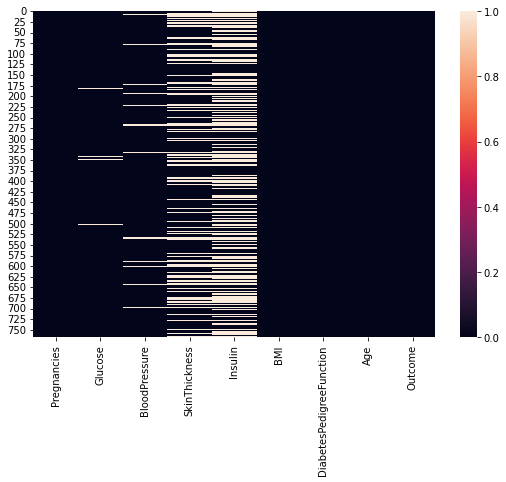

In [12]:
#Let check the missing values graphically in each column
plt.figure(figsize=(9,6))
sns.heatmap(df_copy.isnull(), cbar=True)

#### Insulinand Skin Thickness have many missing values

In [90]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)

In [91]:
df_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

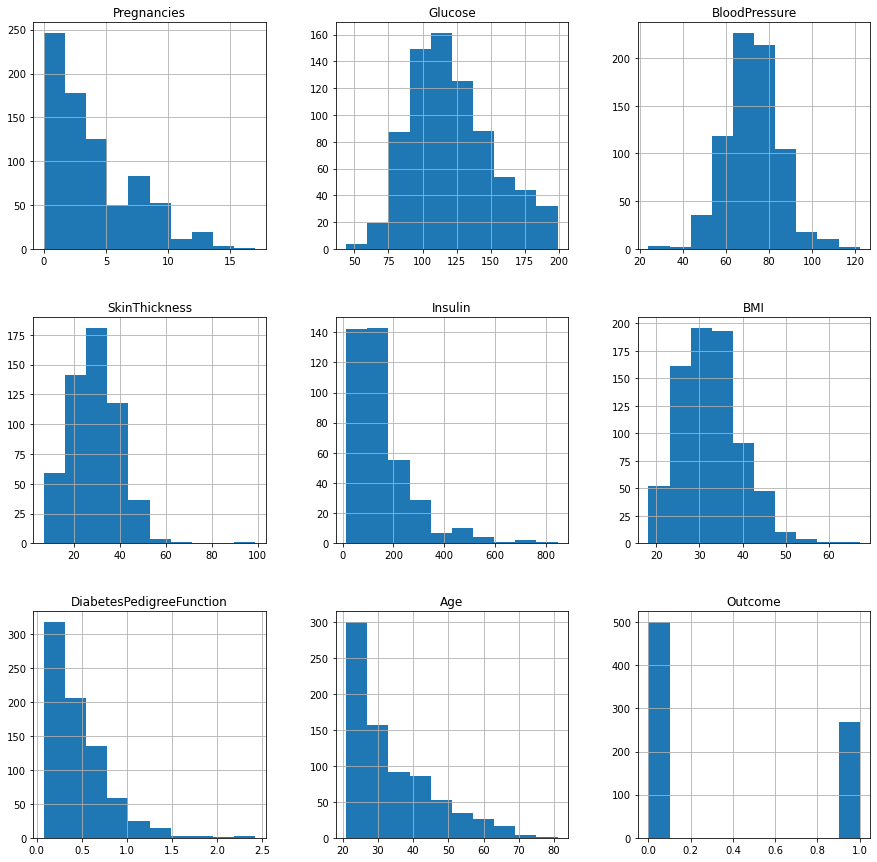

In [13]:
distribution=df_copy.hist(figsize=(15,15))

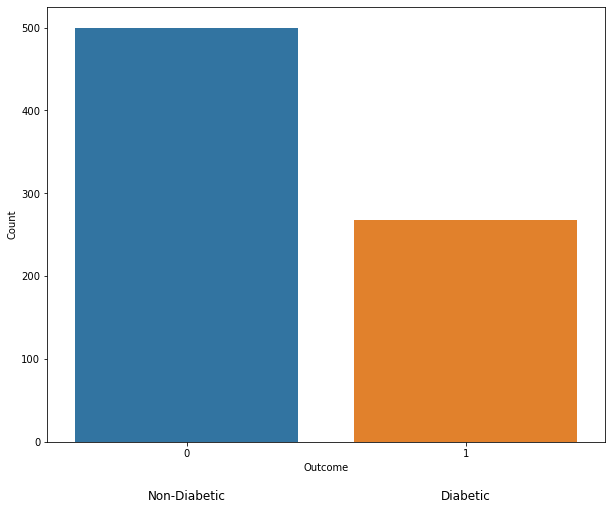

In [14]:
# Create a dictionary to map category values to category names
category_names = { 0:'Non-Diabetic',1:  'Diabetic'}
plt.figure(figsize=(10, 8)) 

# Create the countplot with the specified palette
sns.countplot(x='Outcome', data=df)

# Add a legend with the mapped category names
for category_value, category_name in category_names.items():
    plt.text(category_value, -70, category_name, ha='center', fontsize=12)
    
# Set labels for x and y axes
plt.xlabel('Outcome')
plt.ylabel('Count')

# Display the plot
plt.show()
plt.show()

In [15]:
correlation=df.drop('Outcome', axis=1).corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


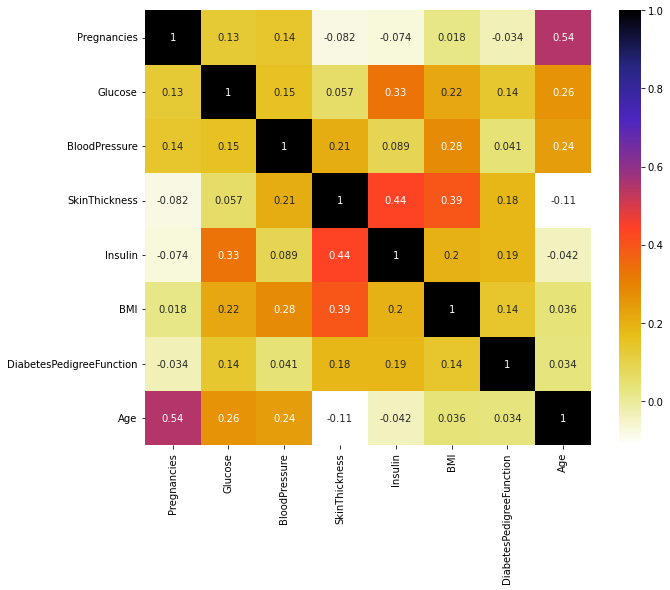

In [16]:
#plotting heatmap for correlation
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

#### -There is no linear correlation between any of the features.

#### -NO strong correlations were observed between the features.

In [17]:
# check the covariance of the numerical data
df.cov()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,11.354056,13.947131,9.214538,-4.390041,-28.555231,0.469774,-0.037426,21.570620,0.356618
Glucose,13.947131,1022.248314,94.430956,29.239183,1220.935799,55.726987,1.454875,99.082805,7.115079
BloodPressure,9.214538,94.430956,374.647271,64.029396,198.378412,43.004695,0.264638,54.523453,0.600697
SkinThickness,-4.390041,29.239183,64.029396,254.473245,802.979941,49.373869,0.972136,-21.381023,0.568747
Insulin,-28.555231,1220.935799,198.378412,802.979941,13281.180078,179.775172,7.066681,-57.143290,7.175671
BMI,0.469774,55.726987,43.004695,49.373869,179.775172,62.159984,0.367405,3.360330,1.100638
DiabetesPedigreeFunction,-0.037426,1.454875,0.264638,0.972136,7.066681,0.367405,0.109779,0.130772,0.027472
Age,21.570620,99.082805,54.523453,-21.381023,-57.143290,3.360330,0.130772,138.303046,1.336953
Outcome,0.356618,7.115079,0.600697,0.568747,7.175671,1.100638,0.027472,1.336953,0.227483


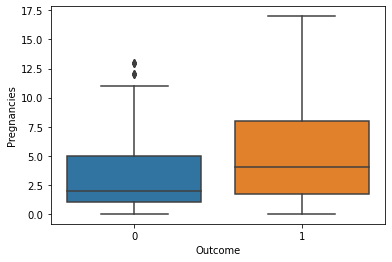

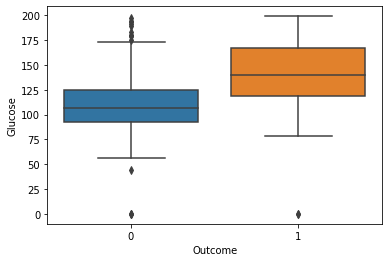

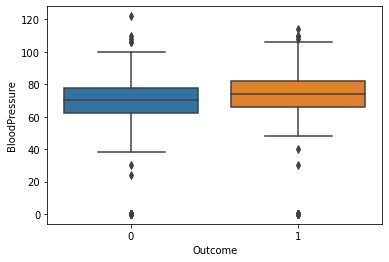

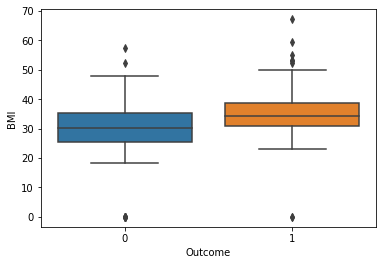

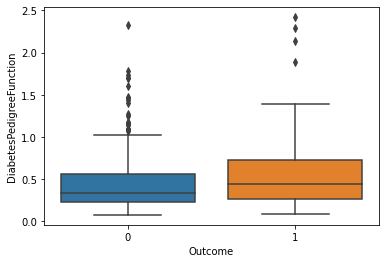

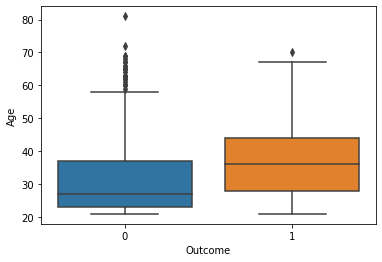

In [18]:
#boxplots
num_cols = ['Pregnancies', 'Glucose', 'BloodPressure','BMI', 'DiabetesPedigreeFunction', 'Age']
for col in num_cols:
    sns.boxplot(x = df['Outcome'].astype('category'), y = col, data=df)
    plt.show()

### OBSERVATIONS:

#### -we can see the presence of outliers


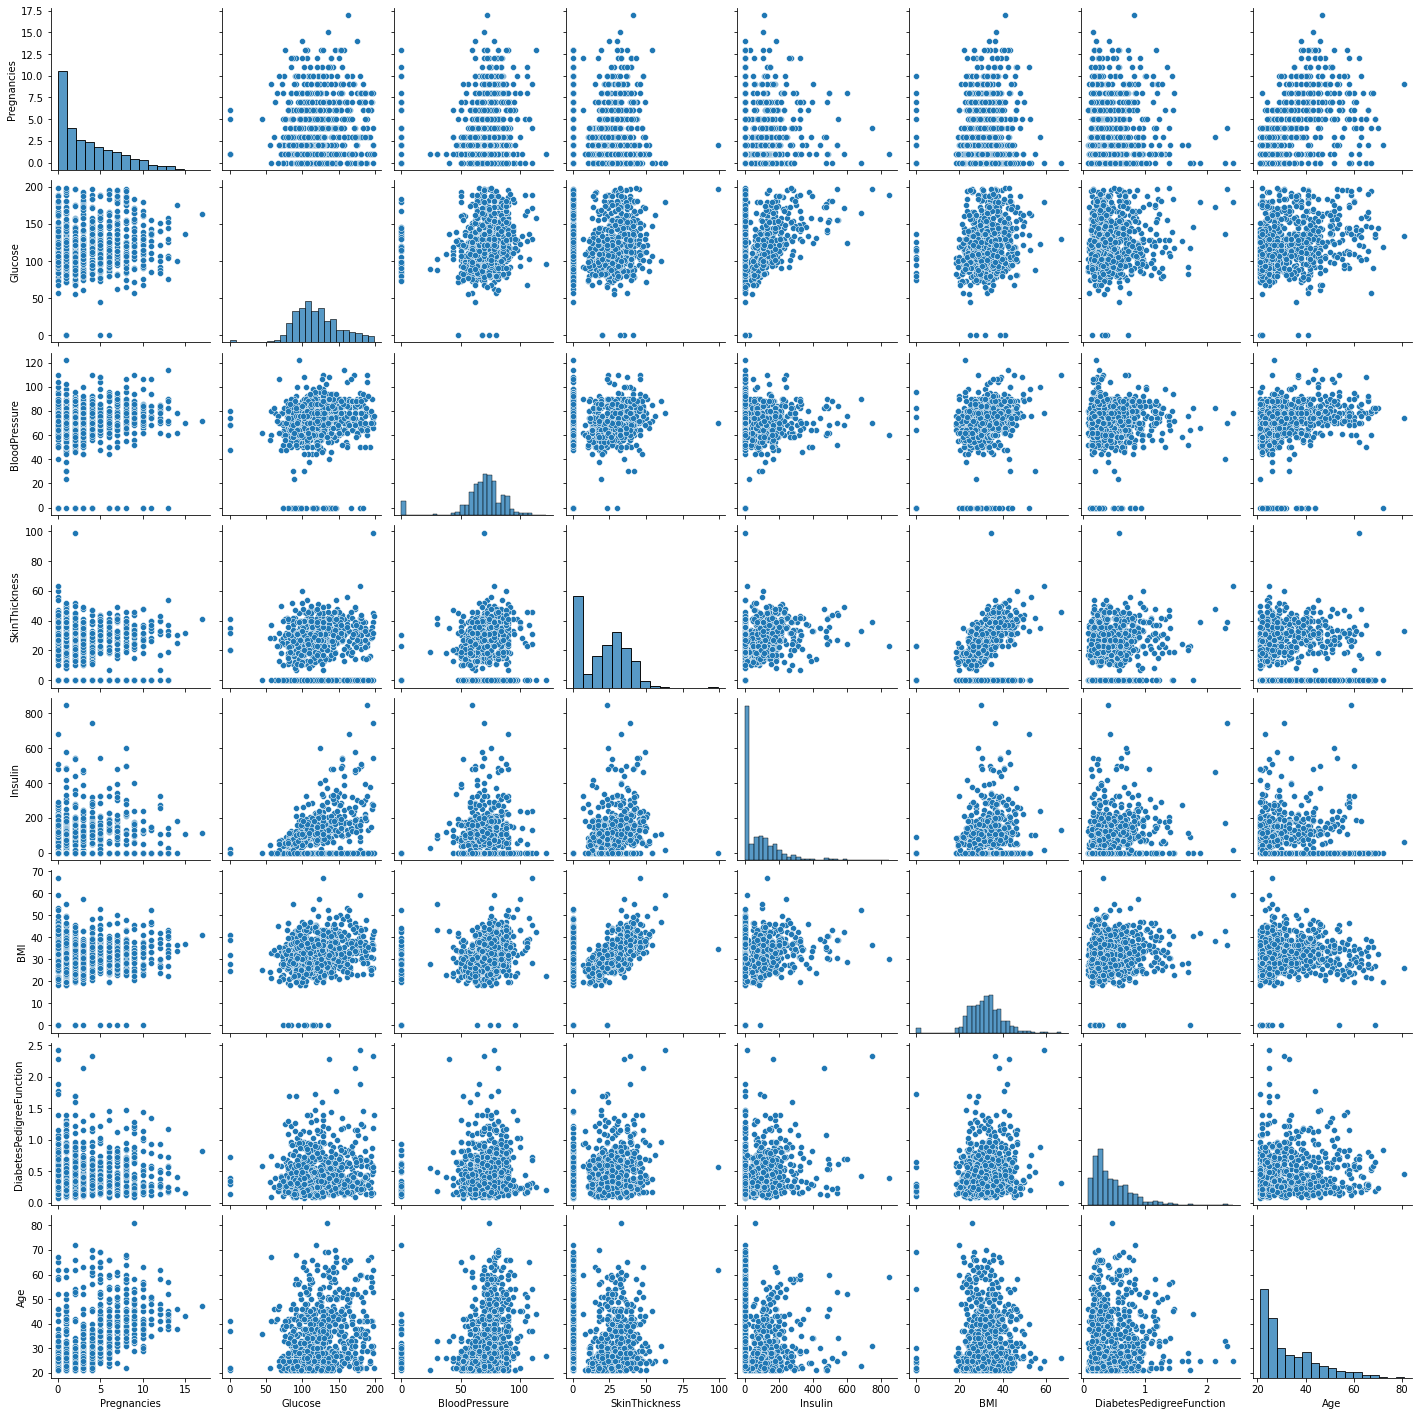

In [19]:
#pairplot
sns.pairplot(df.drop('Outcome',axis=1))
plt.show()

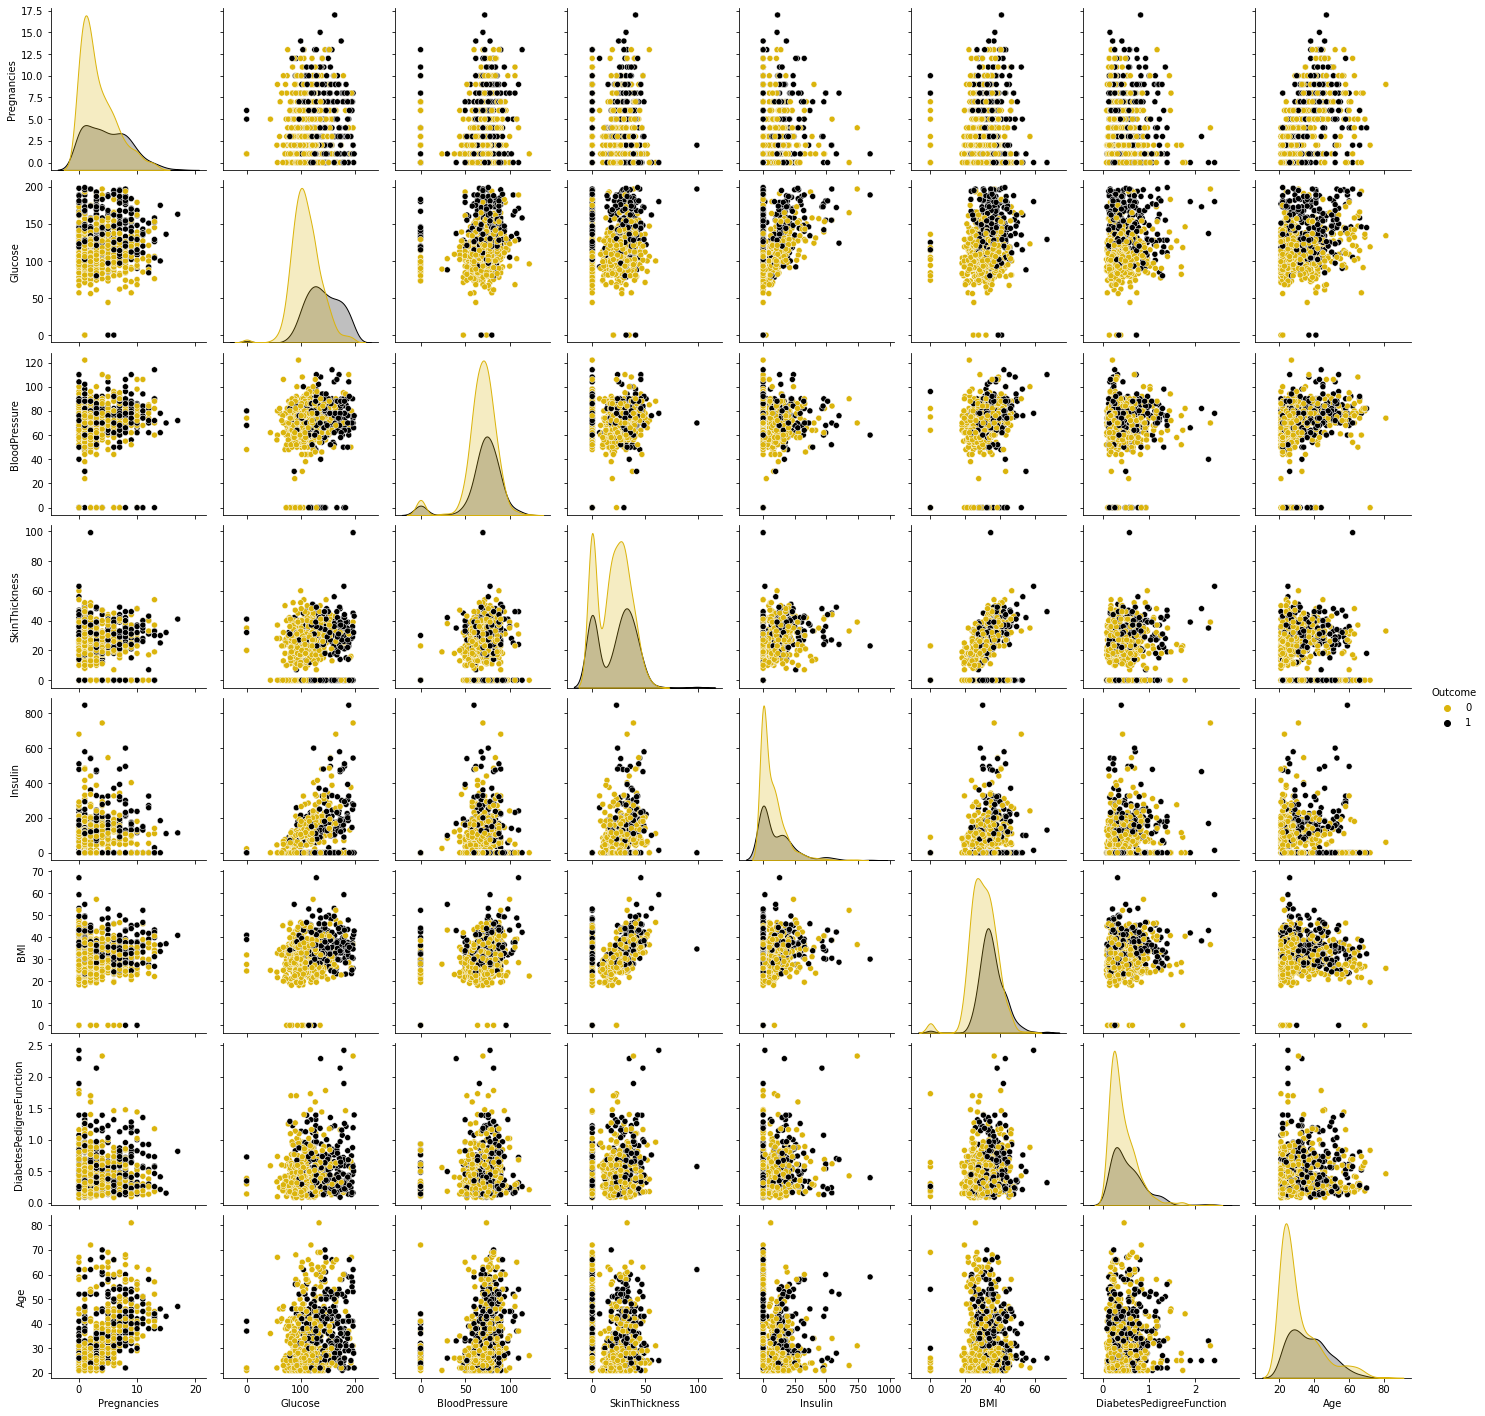

In [20]:
# Create a custom color palete to view the seperability more clearly
palette = sns.xkcd_palette(['gold', 'black'])
sns.pairplot(df,hue = 'Outcome',palette= palette)
plt.show()

### OBSERVATIONS:

#### The diagonals show the univariate distributions of each feature.

# Classification Problem

In [21]:
#importing required libararies for classification
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.model_selection import learning_curve,cross_val_score,validation_curve
from sklearn.ensemble import RandomForestClassifier

In [22]:
y=df['Outcome']
X=df.drop('Outcome',axis=1)

In [56]:
#splitting into train and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# KNN

In [58]:
#library from sklearn for knn
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knn= KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       107
           1       0.74      0.49      0.59        47

    accuracy                           0.79       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.79      0.79      0.78       154



#### It gives an accuracy of 79% 

In [61]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, knn_pred)
cm

array([[99,  8],
       [24, 23]], dtype=int64)

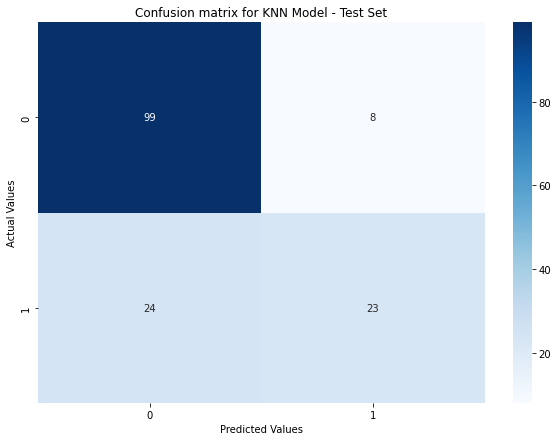

In [62]:
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for KNN Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# RANDOM FOREST

In [63]:
#Importing required libaries for implementing Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [64]:
# Fitting Random Forest Classification to the Training set
RFC = RandomForestClassifier(n_jobs=-1)
RFC.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [65]:
# Predicting the Test set results
y_pred = RFC.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[92, 15],
       [13, 34]], dtype=int64)

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       107
           1       0.69      0.72      0.71        47

    accuracy                           0.82       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.82      0.82      0.82       154



In [67]:
#RandomizedsearchCv for parameter tuning
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
grid1 = RandomizedSearchCV(estimator=RFC, param_distributions=random_grid, cv=10)
grid1.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 65, 110, 155,
                                                         200]})

In [68]:
print(grid1.best_params_)

{'n_estimators': 110, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': True}


In [69]:
RFC1 = RandomForestClassifier(criterion='entropy',n_estimators= 110, min_samples_split= 5, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 60, bootstrap= True,n_jobs=-1)
RFC1.fit(X_train, y_train)
y_pred1 = RFC1.predict(X_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       107
           1       0.73      0.68      0.70        47

    accuracy                           0.82       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.82      0.82      0.82       154



#### There is'nt much  improvement in metrics after hyperparameter tuning using RandomisedsearchCV

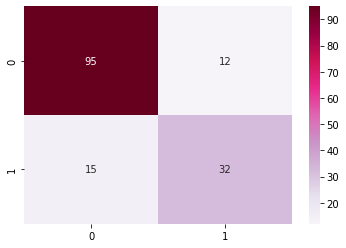

In [70]:
#confusion matrix for Random Forest.
confusion_matrix_rf=confusion_matrix(y_test,y_pred1)
sns.heatmap(confusion_matrix_rf,annot=True,cmap='PuRd')
plt.show()

# SVM

In [71]:
#libraries for svm
from sklearn import svm
from sklearn.svm import SVC

In [72]:
#Getting svm classifier for different kernels.
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=2, C=1, decision_function_shape='ovo').fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [73]:
linear_pred = linear.predict(X_test)
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
sig_pred = sig.predict(X_test)

In [74]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin = linear.score(X_test, y_test)
accuracy_poly = poly.score(X_test, y_test)
accuracy_rbf = rbf.score(X_test, y_test)
accuracy_sig = sig.score(X_test, y_test)
print(f"Accuracy of Linear Kernel: {accuracy_lin}")
print(f"Accuracy of Polynomial Kernel: {accuracy_poly}")
print(f"Accuracy of Radial Basis Kernel: {accuracy_rbf}")
print(f"Accuracy of Sigmoid Kernel: {accuracy_sig}")

Accuracy of Linear Kernel: 0.8116883116883117
Accuracy of Polynomial Kernel: 0.7467532467532467
Accuracy of Radial Basis Kernel: 0.7532467532467533
Accuracy of Sigmoid Kernel: 0.7337662337662337


In [82]:
print(classification_report(y_test,rbf_pred ))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83       107
           1       0.64      0.45      0.52        47

    accuracy                           0.75       154
   macro avg       0.71      0.67      0.68       154
weighted avg       0.74      0.75      0.74       154



In [76]:
#Using GridsearchCV for the hyperparameter tuning. 
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid =[ {'C': [0.1, 1, 10, 100, 1000],
            'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
            'kernel': ['rbf']},{"kernel": ["linear"], "C": [1, 10, 100, 1000]},{'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000] },{"kernel": ["poly"],"degree":[2,3,4], "C": [1, 10, 100, 1000]}]

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 73 candidates, totalling 365 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.634 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.642 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.642 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.642 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.639 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.715 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.764 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.797 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.699 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.730 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.634 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [0.001, 0.1, 0.1, 10, 25, 50, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001, 1e-05],
                          'kernel': ['sigmoid']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'kernel': ['poly']}],
             verbose=3)

In [77]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.001)


In [81]:
best_params_linear = svm.SVC(kernel='rbf', gamma=0.001, C=1000, decision_function_shape='ovo').fit(X_train, y_train)
best_lin_pred = best_params_linear.predict(X_test)
accuracy_best_params_linear = best_params_linear.score(X_test, y_test)
print(f"Accuracy linear Kernel: {accuracy_best_params_linear}")



print(classification_report(y_test,best_lin_pred))

Accuracy linear Kernel: 0.7987012987012987
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       107
           1       0.72      0.55      0.63        47

    accuracy                           0.80       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.79      0.80      0.79       154



### Observation:
#### We can say that there is an improvement in accuracy after hyper parameter tuning using GridsearchCV

# XGBOOST

In [86]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [87]:
import xgboost as xgb
xgb_cl = xgb.XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3)

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       107
           1       0.68      0.72      0.70        47

    accuracy                           0.81       154
   macro avg       0.78      0.79      0.78       154
weighted avg       0.82      0.81      0.81       154



# CONCLUSIONS

#### -Many outliers were observed in the data.
#### -As there was variation in feature values so feature scaling was performed.
#### -KNN is giving the low accuracy when compared to other algoritms
#### -By observing the classification reports we can say that best accuracy is obtained for RANDOM FOREST.